<a href="https://colab.research.google.com/github/nafisenik/DataMinig_pySpark/blob/main/question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 3

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=af936c81b4d9689b9eb5fc835610838c1a72e4f0ec9c5f114f1d4225b50f6101
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
! pip install -q pyspark

     |████████████████████████████████| 281.4 MB 40 kB/s 
     |████████████████████████████████| 198 kB 77.9 MB/s 


In [ ]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
! tar xf spark-3.2.1-bin-hadoop3.2.tgz

### Import libraries

In [32]:
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import pandas as pd
import numpy as np
from apyori import apriori
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.types import ArrayType, StringType
from random import random
from operator import add
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import split

### Read our data

In [ ]:
#'http://snap.stanford.edu/class/cs246-data/browsing.txt'
text_file = open("browsing.txt", "r")
lines = text_file.readlines()
#lines = text_file.read().split(' ')

text_file.close()

In [ ]:
with open("browsing.txt") as file_in:
  baskets = []
  for line in file_in:
      #print(line)
      spilited_item = line.split()
      #print(spilited_item)
      baskets.append(spilited_item)

In [ ]:
unique_baskets = []
for l in baskets:
  x = list(set(l))
  unique_baskets.append(x)

In [ ]:
unique_baskets[0]

['ELE17451', 'FRO11987', 'GRO99222', 'ELE89019', 'SNA90258']

### Word cloud of our data

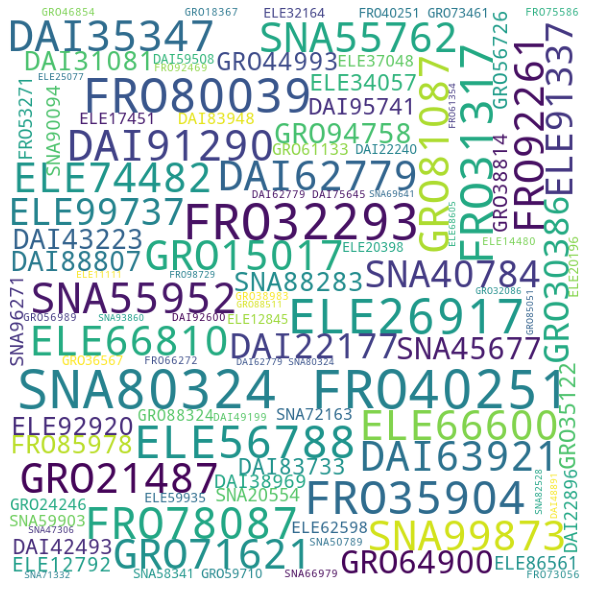

In [ ]:
flat_basket = [ item for elem in unique_baskets for item in elem]
item_basket = " ".join(flat_basket)
 
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 10).generate(item_basket)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Create our model

In [ ]:
rules = apriori(unique_baskets, min_support=0.003, min_confidance=0.2, min_lift=3, min_length=2)


### Convert rules to Data frame

In [ ]:
extracted_rules = list(rules)
df = pd.DataFrame(extracted_rules)
df.head()

,items,support,ordered_statistics
0,"(FRO78087, DAI16732)",0.003408,"[((DAI16732), (FRO78087), 0.5668449197860962, ..."
1,"(SNA44451, DAI18527)",0.003280,"[((DAI18527), (SNA44451), 0.3805970149253731, ..."
2,"(ELE37048, DAI22240)",0.007042,"[((DAI22240), (ELE37048), 0.36683417085427134,..."
3,"(DAI22240, ELE74482)",0.003312,"[((DAI22240), (ELE74482), 0.17252931323283083,..."
4,"(DAI22896, GRO38814)",0.007170,"[((DAI22896), (GRO38814), 0.18293683347005743,..."


### Print our rules

In [ ]:
for x in range(len(extracted_rules)):
  my_str_list = str([x for x in extracted_rules[x][0]])
  print(f'Rule {x} --->'+ my_str_list)

Rule 0 --->['FRO78087', 'DAI16732']
Rule 1 --->['SNA44451', 'DAI18527']
Rule 2 --->['ELE37048', 'DAI22240']
Rule 3 --->['DAI22240', 'ELE74482']
Rule 4 --->['DAI22896', 'GRO38814']
Rule 5 --->['DAI22896', 'SNA72163']
Rule 6 --->['DAI23334', 'DAI62779']
Rule 7 --->['DAI23334', 'ELE92920']
Rule 8 --->['GRO56989', 'DAI31081']
Rule 9 --->['GRO69543', 'DAI31081']
Rule 10 --->['ELE66810', 'DAI35347']
Rule 11 --->['DAI35347', 'FRO31317']
Rule 12 --->['DAI37288', 'ELE32164']
Rule 13 --->['DAI38969', 'FRO19671']
Rule 14 --->['DAI42083', 'DAI92600']
Rule 15 --->['DAI42083', 'GRO59710']
Rule 16 --->['SNA59903', 'DAI42083']
Rule 17 --->['ELE92920', 'DAI42493']
Rule 18 --->['DAI42493', 'GRO59710']
Rule 19 --->['SNA18336', 'DAI42493']
Rule 20 --->['DAI43223', 'ELE32164']
Rule 21 --->['DAI43223', 'FRO99372']
Rule 22 --->['DAI43223', 'GRO59710']
Rule 23 --->['SNA82528', 'DAI43868']
Rule 24 --->['DAI46755', 'FRO81176']
Rule 25 --->['ELE78169', 'DAI48891']
Rule 26 --->['GRO36567', 'DAI48891']
Rule 27 ---

### Support, Confidence and Lift parameters for each rule

In [ ]:
STR_SEP = '*'*30
def statistical_info(rules_set):
  index = 0
  for rule in rules_set:
    print(STR_SEP + f'Rule {index}' + STR_SEP )
    my_str_list = '  '.join([x for x in rules_set[x][0]])
    print('Items ---> ' + my_str_list)
    print("Support  ---> " + str(rule[1]))
    print("Confidence ---> " + str(rule[2][0][2]))
    print("Lift ---> " + str(rule[2][0][3]))
    index += 1
  

In [ ]:
statistical_info(extracted_rules)

******************************Rule 0******************************
Items ---> SNA80324  FRO40251  ELE17451  GRO85051  DAI62779
Support  ---> 0.0034082505385678915
Confidence ---> 0.5668449197860962
Lift ---> 11.514986185674315
******************************Rule 1******************************
Items ---> SNA80324  FRO40251  ELE17451  GRO85051  DAI62779
Support  ---> 0.003279637310697405
Confidence ---> 0.3805970149253731
Lift ---> 67.63970149253731
******************************Rule 2******************************
Items ---> SNA80324  FRO40251  ELE17451  GRO85051  DAI62779
Support  ---> 0.007041574225909134
Confidence ---> 0.36683417085427134
Lift ---> 14.225573002167947
******************************Rule 3******************************
Items ---> SNA80324  FRO40251  ELE17451  GRO85051  DAI62779
Support  ---> 0.003311790617665027
Confidence ---> 0.17252931323283083
Lift ---> 4.077381588795039
******************************Rule 4******************************
Items ---> SNA80324  FRO4025

In [ ]:
spark = SparkSession.builder.appName('FrequentItem').getOrCreate()
sc = spark.sparkContext

In [ ]:
spark_df = spark.createDataFrame(unique_baskets, ArrayType(StringType(), False))

In [ ]:
spark_df.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                         |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[ELE17451, FRO11987, GRO99222, ELE89019, SNA90258]                                                                                                                                            |
|[FRO90334, FRO12685, GRO12298, ELE26917, SNA30755, ELE17451, GRO99222, SNA80192, ELE91550, ELE52966, SNA11465, FRO84225]                                                                      |
|[DAI22896, FRO86643, GRO73461, SNA

In [ ]:
fpGrowth = FPGrowth(itemsCol="value", minSupport=0.003, minConfidence=0.2)
model = fpGrowth.fit(spark_df)
model.freqItemsets.show()
model.associationRules.show()
model.transform(spark_df).show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+----+
|               items|freq|
+--------------------+----+
|          [DAI20585]| 120|
|          [ELE85027]| 478|
|[ELE85027, ELE20847]|  99|
|[ELE85027, DAI62779]| 119|
|          [FRO48038]| 327|
|[FRO48038, FRO43226]| 105|
|          [SNA19378]| 117|
|          [FRO99783]| 764|
|[FRO99783, FRO35904]| 122|
|[FRO99783, ELE17451]| 108|
|[FRO99783, FRO85978]|  97|
|[FRO99783, GRO46854]| 128|
|[FRO99783, DAI62779]| 210|
|          [ELE27376]| 159|
|          [DAI50921]| 350|
|[DAI50921, DAI62779]| 106|
|          [FRO87855]| 131|
|          [GRO12298]| 385|
|          [DAI72236]| 280|
|          [SNA36781]| 165|
+--------------------+----+
only showing top 20 rows

+--------------------+----------+-------------------+------------------+--------------------+
|          antecedent|consequent|         confidence|              lift|             support|
+--------------------+----------+-------------------+------------------+--------------------+
|[DAI85309, ELE17451